In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("avocado.csv")

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
data.shape

(18249, 14)

In [6]:
data.rename(columns={'Unnamed:0':'id'}, inplace = True )

In [7]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Distribution

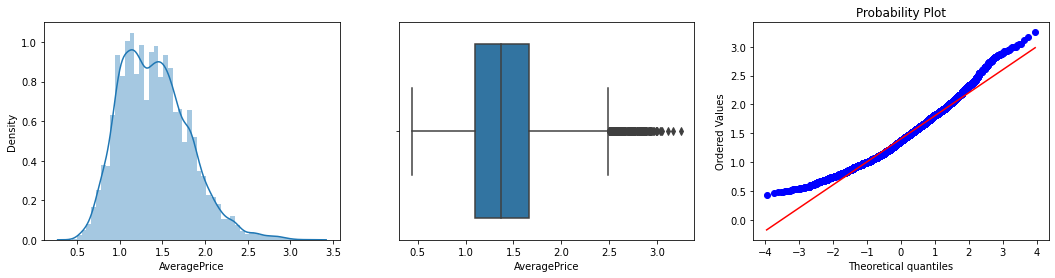

In [8]:
import seaborn as sns
f , ax = plt.subplots(nrows =1,ncols= 3 ,figsize=(18,4))
sns.distplot(data.AveragePrice , ax=ax[0])
sns.boxplot(data.AveragePrice, ax=ax[1])
from scipy import stats
stats.probplot(data['AveragePrice'],plot=ax[2])
plt.show()


In [9]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [10]:
print('Skewness: %f'% data['AveragePrice'].skew())

Skewness: 0.580303


skewness acceptable if lies between -3 to +3

In [11]:
print ("Kurtosis: %f" % data['AveragePrice'].kurt())

Kurtosis: 0.325196


kurtosis acceptable is values lies from -10 to +10

In [12]:
data_conventional=data[data['type']== 'conventional']
data_organic=data[data['type']== 'organic']

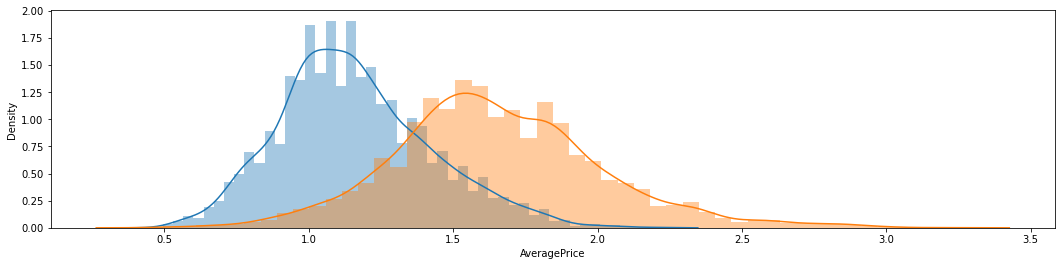

In [13]:
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,4))
sns.distplot(data_conventional['AveragePrice'])
sns.distplot(data_organic['AveragePrice'])
plt.show()

the the organic avocardos are more expensive

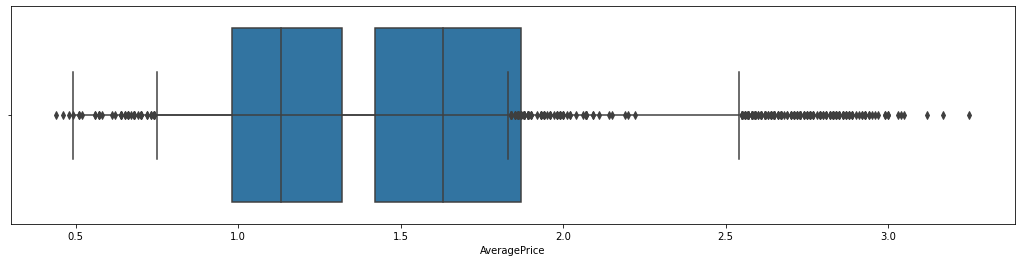

In [14]:
data_conventional=data[data['type']== 'conventional']
data_organic=data[data['type']== 'organic']
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,4))
sns.boxplot(data_conventional['AveragePrice'])
sns.boxplot(data_organic['AveragePrice'])
plt.show()

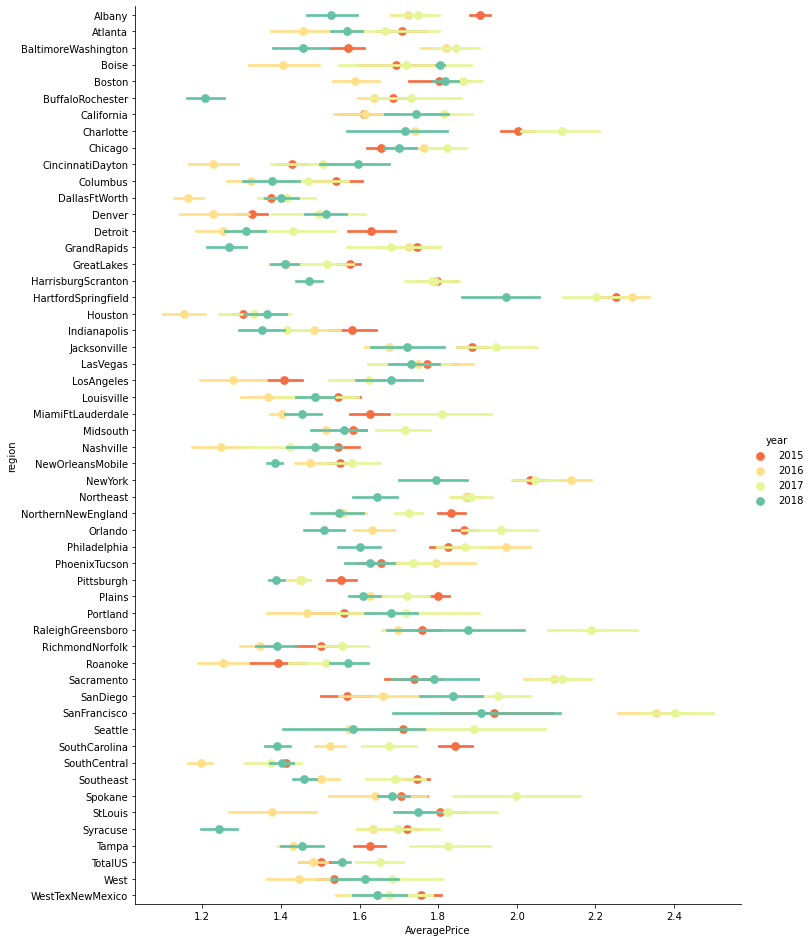

In [15]:
mask = data['type']== 'organic'
g = sns.factorplot("AveragePrice",'region',data=data[mask],
    hue='year',size=13,aspect=0.8,palette='Spectral',join=False)

# Correlation matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

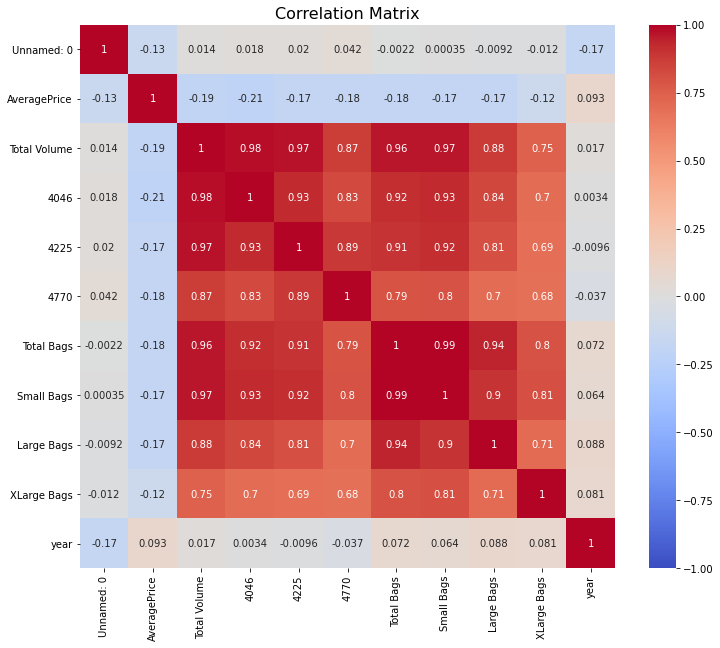

In [16]:
corrmat = data.corr()
f, ax =plt.subplots(nrows=1,ncols=1 ,figsize=(12,10))
ax.set_title("Correlation Matrix", fontsize=16)
filter = data. columns !='id'
sns.heatmap(data[data.columns[filter]].corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True)

# Total volume and Total Bags have more correlation

In [17]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


no outliers

# Select the model

In [18]:
X = data.drop("AveragePrice",1)
y = data['AveragePrice']
print('shape of X and y respectively :',X.shape,y.shape)


shape of X and y respectively : (18249, 13) (18249,)


# Model training

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X , y , test_size=0.2,random_state=0)
print('shape of X anf y respectively (train):', X_train.shape, y_train.shape)
print('shape of X anf y respectively (test):', X_test.shape, y_test.shape)

shape of X anf y respectively (train): (14599, 13) (14599,)
shape of X anf y respectively (test): (3650, 13) (3650,)


Taking Chicago as region with conventional avocardos

In [20]:
region ='Chicago'
filter =data_conventional['region'] != region
data_conventional_chi = data_conventional.drop(data_conventional[filter].index, inplace=False)
data_conventional_chi.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8581,7,2018-02-04,0.88,1802646.35,257095.68,1235325.42,158735.41,151489.84,91953.59,59112.77,423.48,conventional,2018,Chicago
8582,8,2018-01-28,1.36,947968.47,108233.69,515116.55,124271.04,200347.19,79871.28,120462.37,13.54,conventional,2018,Chicago
8583,9,2018-01-21,1.42,951648.11,110759.53,473797.46,154585.97,212505.15,79124.15,133370.44,10.56,conventional,2018,Chicago
8584,10,2018-01-14,1.64,762997.53,82376.44,440322.05,134141.55,106157.49,93374.57,12782.92,0.00,conventional,2018,Chicago
8585,11,2018-01-07,1.50,842141.42,132853.21,475772.58,139314.80,94200.83,85019.84,9161.86,19.13,conventional,2018,Chicago


# Evaluate the model

Model prediction of Chicago in 2019 for AveragePrice
$1.8481832593532204 USD 


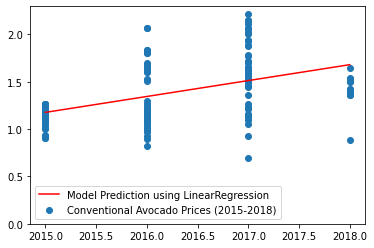

In [21]:
from scipy import stats
X= data_conventional_chi.year
y= data_conventional_chi['AveragePrice']
slope, intercept, r , p, std_err = stats.linregress(X,y)
def modelPrediction(x):
    return slope * x + intercept
label ='Model prediction of Chicago in 2019 for AveragePrice'
model = list(map(modelPrediction,X))
x_pred = 2019
y_pred =modelPrediction(x_pred)
print (label)
ap_conventional_chi =round(y_pred,2)
print('${} USD '.format(y_pred))
plt.scatter(X,y) # scatterplot
plt.plot(X,model,color = 'red')
plt.ylim(ymin=0) # starts with zero
plt.legend(['Model Prediction using LinearRegression','Conventional Avocado Prices (2015-2018)'])
plt.show()

I can predict an increase from 1.50 USD in 2018 to 1.85 USD in 2019 for Conventional Avacados in Chicago

In [22]:
region ='Chicago'
filter =data_organic['region'] != region
data_organic_chi = data_organic.drop(data_organic[filter].index, inplace=False)
data_organic_chi.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17704,7,2018-02-04,1.62,46956.84,313.29,32668.25,0.0,13975.30,13975.30,0.00,0.0,organic,2018,Chicago
17705,8,2018-01-28,1.72,40770.94,215.40,31318.93,0.0,9236.61,9236.61,0.00,0.0,organic,2018,Chicago
17706,9,2018-01-21,1.82,36688.67,83.93,28134.16,0.0,8470.58,8470.58,0.00,0.0,organic,2018,Chicago
17707,10,2018-01-14,1.79,44955.89,133.39,31177.44,0.0,13645.06,13635.06,10.00,0.0,organic,2018,Chicago
17708,11,2018-01-07,1.83,41573.25,118.84,29600.36,0.0,11854.05,11850.72,3.33,0.0,organic,2018,Chicago


I can predict the price,increases from 1.62 USD in 2018 to 1.83 USD in 2019 for organic Avocados in Chicago

Model prediction of Chicago in 2019 for AveragePrice
$1.8932974001268263 USD 


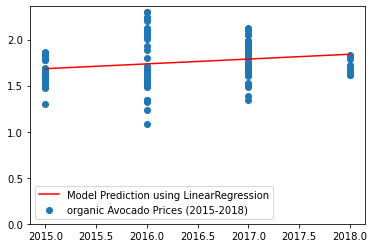

In [23]:
from scipy import stats
X= data_organic_chi.year
y= data_organic_chi['AveragePrice']
slope, intercept, r , p, std_err = stats.linregress(X,y)
def modelPrediction (x):
    return slope * x + intercept
label ='Model prediction of Chicago in 2019 for AveragePrice'
model = list(map(modelPrediction,X))
x_pred = 2019
y_pred =modelPrediction(x_pred)
print (label)
ap_organic_chi =round(y_pred,2)
print('${} USD '.format(y_pred))
plt.scatter(X,y) # scatterplot
plt.plot(X,model,color = 'red')
plt.ylim(ymin=0) # starts with zero
plt.legend(['Model Prediction using LinearRegression','organic Avocado Prices (2015-2018)'])
plt.show()

I can predict an increase from 1.83 USD in 2018 to 1.89 USD in 2019 for Organic Avacados in Chicago

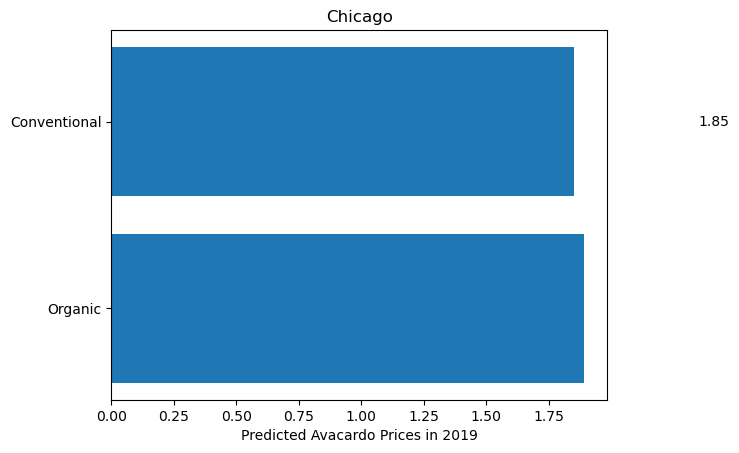

In [24]:
plt .rcdefaults()
fig,ax = plt.subplots() 
y = ('Conventional','Organic')
y_pos=np.arange(len(y))
x = (ap_conventional_chi, ap_organic_chi)
ax.barh(y_pos,x, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()
ax.set_xlabel('Predicted Avacardo Prices in 2019')
ax.set_title('Chicago')
for i, v in enumerate(x):
    ax.text(v + 0.5, i, str(v), color="black", va='center', fontweight='normal')
    plt.show()